# Setup

## Mounting the Drive

In [1]:
import os

from google.colab import drive

drive.mount('/content/drive')
print(os.listdir(os.getcwd())) 

Mounted at /content/drive
['.config', 'drive', 'sample_data']


In [2]:
# you might need to create a google drive SHORTCUT that has this same path
# ... or update the path to use your own google drive organization
DIRPATH = '/content/drive/MyDrive/Research/Disinfo Research Shared 2022'
print(DIRPATH)
os.path.isdir(DIRPATH)

/content/drive/MyDrive/Research/Disinfo Research Shared 2022


True

# Usage

## Import User Profile Hashtag Pairs

In [3]:
csv_filepath = os.path.join(DIRPATH, "data", "user_profile_hashtag_pairs_v4.csv")
os.path.isfile(csv_filepath)

True

In [5]:
from pandas import read_csv

user_pairs_df = read_csv(csv_filepath)
user_pairs_df

,Unnamed: 0,user_id,tag_0,tag_1
0,0,22762000,#0,#2
1,1,1864065690,#0,#JUNKIE
2,2,2785726018,#1,#2
3,3,1125970519298269185,#1,#2
4,4,860854368,#1,#2
...,...,...,...,...
2846954,2846954,1163835134,#TEAMROUSEY,#NOTREDAME
2846955,2846955,1163835134,#TEAMMMA4LIFE,#WARLOVSKI
2846956,2846956,1163835134,#TEAMMMA4LIFE,#NOTREDAME
2846957,2846957,1163835134,#WARLOVSKI,#NOTREDAME


## Hashtag Selection

Look, 2.8B rows is just too much. Plus why do we need all the rows anyway? Why don't we focus on which hashtags co-occur with a given hashtag. We can try a handful of iterations, using tags like "#QANON", "#WWG1WGA", etc, and see what comes up.

In [11]:
# https://stackoverflow.com/a/29461232/670433

SELECTED_TAG = "#QANON"

selected_user_pairs_df = user_pairs_df[
    (user_pairs_df["tag_0"] == SELECTED_TAG) |
    (user_pairs_df["tag_1"] == SELECTED_TAG)
]
print(len(selected_user_pairs_df))
selected_user_pairs_df.head()

38118


,Unnamed: 0,user_id,tag_0,tag_1
411,411,809515998831255552,#1,#QANON
414,414,809515998831255552,#KAG,#QANON
416,416,809515998831255552,#MAGA,#QANON
418,418,809515998831255552,#QANON,#WWG1WGA
432,432,1149028897247416320,#1,#QANON


38K rows is much more manageable. 

### User Profile Hashtag Co-occurrence Matrix

In [ ]:
## https://www.kaggle.com/code/rtatman/co-occurrence-matrix-plot-in-python
#
#from pandas import crosstab
#
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
## ... Compute a simple cross tabulation of two (or more) factors.
## ... By default, computes a frequency table of the factors 
## ... index: Values to group by in the rows
## ... columns: Values to group by in the columns.
## ... rownames: If passed, must match number of row arrays passed
## ... colnames: If passed, must match number of column arrays passed.
##
#co_matrix = crosstab(user_pairs_df.tag_0, user_pairs_df.tag_1) 
#
#print(type(co_matrix))
#print(co_matrix.shape)
#co_matrix

In [ ]:
##> Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out Colab Pro.
## ... (hmmm, maybe need to do this locally...)

In [ ]:
## NOPE NOT ENOUGH MEMORY LOCALLY EITHER.

In [ ]:
# LET'S TRY WITH THE SELECTED TAG ONLY

In [12]:
# https://www.kaggle.com/code/rtatman/co-occurrence-matrix-plot-in-python

from pandas import crosstab

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
# ... Compute a simple cross tabulation of two (or more) factors.
# ... By default, computes a frequency table of the factors 
# ... index: Values to group by in the rows
# ... columns: Values to group by in the columns.
# ... rownames: If passed, must match number of row arrays passed
# ... colnames: If passed, must match number of column arrays passed.
#
co_matrix = crosstab(selected_user_pairs_df.tag_0, selected_user_pairs_df.tag_1) 

print(type(co_matrix))
print(co_matrix.shape)
co_matrix

<class 'pandas.core.frame.DataFrame'>
(5944, 9)


tag_1,#KAG2020,#PROLIFE,#QANON,#RESIST,#RESISTANCE,#THERESISTANCE,#TRUMP,#TRUMP2020,#WWG1WGA
tag_0,,,,,,,,,
#0010110,0,0,1,0,0,0,0,0,0
#0DOUBT,0,0,1,0,0,0,0,0,0
#1,0,0,17,0,0,0,0,0,0
#100,0,0,1,0,0,0,0,0,0
#101ST,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
#ZEOLIARMY,0,0,1,0,0,0,0,0,0
#ZERO,0,0,1,0,0,0,0,0,0
#ZEROINTEGRITYLEFT,0,0,1,0,0,0,0,0,0


### Inspection

In [19]:
# this is not square. let's look into the dimensions some more
print(co_matrix[SELECTED_TAG].describe())

#co_matrix[SELECTED_TAG] #> 5944
print(sorted(co_matrix[SELECTED_TAG])) # there is only one zero value

count    5944.000000
mean        5.168742
std        73.077422
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      4728.000000
Name: #QANON, dtype: float64
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [20]:
co_matrix[co_matrix[SELECTED_TAG] == 0] # it is for the selected tag itself. we can remove?

tag_1,#KAG2020,#PROLIFE,#QANON,#RESIST,#RESISTANCE,#THERESISTANCE,#TRUMP,#TRUMP2020,#WWG1WGA
tag_0,,,,,,,,,
#QANON,436,406,0,7,2,1,536,1629,4378


In [25]:
top_cos = sorted(co_matrix[SELECTED_TAG], reverse=True)
top_cos[0:10]

[4728, 2175, 873, 850, 826, 692, 567, 468, 461, 425]

In [28]:
co_matrix.sort_values(by=SELECTED_TAG, ascending=False)[SELECTED_TAG][0:50]

tag_0
#MAGA                 4728
#KAG                  2175
#THEGREATAWAKENING     873
#Q                     850
#2A                    826
#PATRIOT               692
#GREATAWAKENING        567
#QARMY                 468
#NRA                   461
#DRAINTHESWAMP         425
#BUILDTHEWALL          388
#WALKAWAY              342
#1A                    341
#CONSERVATIVE          315
#TRUSTTHEPLAN          246
#CHRISTIAN             231
#AMERICAFIRST          227
#CULT45                209
#TRUMPTRAIN            204
#DARKTOLIGHT           196
#POTUS                 188
#THESTORM              177
#WETHEPEOPLE           155
#BACKTHEBLUE           137
#DEPLORABLE            133
#MAGA2020              116
#JESUS                 115
#USA                   113
#CONSTITUTION          108
#GODWINS               107
#SAVETHECHILDREN       105
#DIGITALSOLDIER        102
#GOD                   101
#PATRIOTS               92
#CCOT                   91
#MILITARY               86
#TRUTH                

In [62]:
from plotly.express import bar

#chart_df = co_matrix.sort_values(by=SELECTED_TAG, ascending=False)[SELECTED_TAG][0:25]
chart_df = co_matrix.sort_values(by=SELECTED_TAG, ascending=False).head(20)

chart_data = chart_df.sort_values(by=SELECTED_TAG, ascending=True)[SELECTED_TAG]
print(type(chart_data))

fig = bar(
    y=chart_data.index.tolist(),
    x=chart_data.values.tolist(),
    #orientation="h",
    title=f"User Profile Hashtags Most Co-occurring with '{SELECTED_TAG}'",
    labels={"y": f"User Profile Hashtag", "x": "Number of users with both tags"}
)
fig.show()

<class 'pandas.core.series.Series'>


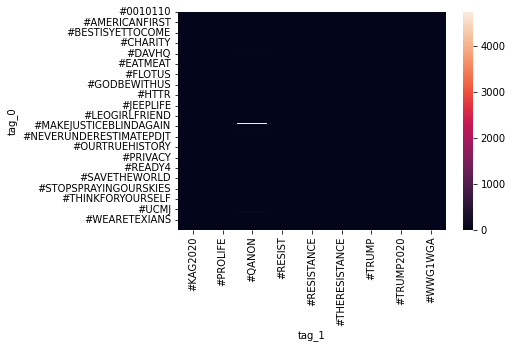

In [73]:
#import seaborn as sns

#sns.heatmap(co_matrix) # hmm not too helpful

# Hashtag Analysis Dashboard

In [77]:
from pandas import crosstab
from plotly.express import bar

def top_co_tags(selected_tag, top_n=20, verbose=False):
    
    # https://stackoverflow.com/a/29461232/670433
    selected_user_pairs_df = user_pairs_df[
        (user_pairs_df["tag_0"] == selected_tag) |
        (user_pairs_df["tag_1"] == selected_tag)
    ]
    print("CO-OCCURRING HASHTAGS:", len(selected_user_pairs_df))
    selected_user_pairs_df.head()

    # https://www.kaggle.com/code/rtatman/co-occurrence-matrix-plot-in-python
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
    # ... Compute a simple cross tabulation of two (or more) factors.
    # ... By default, computes a frequency table of the factors 
    # ... index: Values to group by in the rows
    # ... columns: Values to group by in the columns.
    # ... rownames: If passed, must match number of row arrays passed
    # ... colnames: If passed, must match number of column arrays passed.
    co_matrix = crosstab(selected_user_pairs_df.tag_0, selected_user_pairs_df.tag_1) 
    #print(type(co_matrix)) #> DF
    print("CO-OCCURRENCE MATRIX:", co_matrix.shape)

    chart_df = co_matrix.sort_values(by=selected_tag, ascending=False).head(top_n) # get top N
    chart_data = chart_df.sort_values(by=selected_tag, ascending=True)[selected_tag] # reverse for plotly
    fig = bar(
        y=chart_data.index.tolist(),
        x=chart_data.values.tolist(),
        #orientation="h",
        title=f"User Profile Hashtags Most Co-occurring with '{selected_tag}'",
        labels={"y": f"User Profile Hashtag", "x": "Number of users with both tags in their profile"}
    )
    fig.show()
    if verbose:
        print(chart_df[selected_tag])

top_co_tags("#QANON", verbose=True)

CO-OCCURRING HASHTAGS: 38118
CO-OCCURRENCE MATRIX: (5944, 9)


tag_0
#MAGA                 4728
#KAG                  2175
#THEGREATAWAKENING     873
#Q                     850
#2A                    826
#PATRIOT               692
#GREATAWAKENING        567
#QARMY                 468
#NRA                   461
#DRAINTHESWAMP         425
#BUILDTHEWALL          388
#WALKAWAY              342
#1A                    341
#CONSERVATIVE          315
#TRUSTTHEPLAN          246
#CHRISTIAN             231
#AMERICAFIRST          227
#CULT45                209
#TRUMPTRAIN            204
#DARKTOLIGHT           196
Name: #QANON, dtype: int64


In [78]:
top_co_tags("#MAGA")

CO-OCCURRING HASHTAGS: 213843
CO-OCCURRENCE MATRIX: (26523, 12)


In [79]:
top_co_tags("#KAG")

CO-OCCURRING HASHTAGS: 116513
CO-OCCURRENCE MATRIX: (14875, 13)


In [88]:
top_co_tags("#BUILDTHEWALL")

CO-OCCURRING HASHTAGS: 34564
CO-OCCURRENCE MATRIX: (2794, 2956)


In [89]:
top_co_tags("#DRAINTHESWAMP")

CO-OCCURRING HASHTAGS: 24883
CO-OCCURRENCE MATRIX: (2160, 2536)


In [90]:
top_co_tags("#CHRISTIAN")

CO-OCCURRING HASHTAGS: 25006
CO-OCCURRENCE MATRIX: (3165, 3440)


In [91]:
top_co_tags("#CONSERVATIVE")

CO-OCCURRING HASHTAGS: 36340
CO-OCCURRENCE MATRIX: (3511, 3832)


In [92]:
top_co_tags("#BACKTHEBLUE")

CO-OCCURRING HASHTAGS: 15888
CO-OCCURRENCE MATRIX: (1707, 1873)


In [93]:
top_co_tags("#PATRIOT")

CO-OCCURRING HASHTAGS: 40109
CO-OCCURRENCE MATRIX: (3673, 4121)


In [80]:
top_co_tags("#THEGREATAWAKENING")

CO-OCCURRING HASHTAGS: 9283
CO-OCCURRENCE MATRIX: (1075, 1224)


In [81]:
top_co_tags("#Q")

CO-OCCURRING HASHTAGS: 19929
CO-OCCURRENCE MATRIX: (2279, 2546)


In [82]:
top_co_tags("#QARMY")

CO-OCCURRING HASHTAGS: 6417
CO-OCCURRENCE MATRIX: (815, 890)


In [83]:
top_co_tags("#TRUSTTHEPLAN")

CO-OCCURRING HASHTAGS: 3658
CO-OCCURRENCE MATRIX: (539, 592)


In [84]:
top_co_tags("#DARKTOLIGHT")

CO-OCCURRING HASHTAGS: 3053
CO-OCCURRENCE MATRIX: (476, 540)


In [85]:
top_co_tags("#THESTORM")

CO-OCCURRING HASHTAGS: 1987
CO-OCCURRENCE MATRIX: (303, 330)


In [86]:
top_co_tags("#1A")

CO-OCCURRING HASHTAGS: 30986
CO-OCCURRENCE MATRIX: (2851, 3239)


In [87]:
top_co_tags("#2A")

CO-OCCURRING HASHTAGS: 76943
CO-OCCURRENCE MATRIX: (11013, 16)


In [94]:
top_co_tags("#WEARETHENEWSNOW")

CO-OCCURRING HASHTAGS: 745
CO-OCCURRENCE MATRIX: (158, 169)
